In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/metrics.py -O metrics.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("output/vipers1/regres/eval/ANNZ_randomReg_0000.csv")

In [38]:
data["F:ANNZ_PDF_avg_0"].sort_values()

7385     0.459076
13703    0.460505
11196    0.460870
6412     0.461308
4089     0.464718
           ...   
4173     1.043563
8970     1.047778
6742     1.050814
316      1.051559
5844     1.059908
Name: F:ANNZ_PDF_avg_0, Length: 14298, dtype: float64

In [5]:
data.head()

,D:z,F:ANNZ_best,F:ANNZ_best_wgt,F:ANNZ_best_err,F:ANNZ_MLM_avg_0,F:ANNZ_MLM_avg_0_err,F:ANNZ_MLM_avg_0_wgt,F:ANNZ_PDF_avg_0,F:ANNZ_PDF_avg_0_err,F:ANNZ_PDF_avg_0_wgt,...,F:ANNZ_PDF_0_190,F:ANNZ_PDF_0_191,F:ANNZ_PDF_0_192,F:ANNZ_PDF_0_193,F:ANNZ_PDF_0_194,F:ANNZ_PDF_0_195,F:ANNZ_PDF_0_196,F:ANNZ_PDF_0_197,F:ANNZ_PDF_0_198,F:ANNZ_PDF_0_199
0,0.4858,0.544127,1,0.062067,0.539627,0.063727,1,0.552347,0.096432,1,...,0,0,0,0,0,0,0,0,0,0
1,0.6564,0.685621,1,0.089893,0.688422,0.083994,1,0.689544,0.119470,1,...,0,0,0,0,0,0,0,0,0,0
2,0.9220,0.719952,1,0.064731,0.727404,0.066886,1,0.720386,0.109561,1,...,0,0,0,0,0,0,0,0,0,0
3,0.5642,0.560139,1,0.136236,0.596571,0.138421,1,0.611533,0.149442,1,...,0,0,0,0,0,0,0,0,0,0
4,0.8254,0.883784,1,0.170802,0.855991,0.158759,1,0.825445,0.167368,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import metrics
result = metrics.compute_metrics(data["D:z"].values,data["F:ANNZ_best"].values,"ANNz")

In [7]:
result.to_frame()

,ANNz
RMSE_znorm,0.0866869
bias_znorm,0.00661464
std_znorm,0.0864342
RMSE,0.132316
|znorm| > 0.15 (%),4.13345
|znorm| > 3std (%),1.49671
scatter,0.0866869
bias,0.0482413
fr015,95.8666
sigma68,"(-0.08197743, 0.08272181)"


In [8]:
zphot = data["F:ANNZ_best"].values
zspec = data["D:z"].values

In [9]:
pdf = np.empty((len(data),200))
pdf.shape

(14298, 200)

In [10]:
for i in range(200):
    teste = data["F:ANNZ_PDF_0_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf[:,i] = teste[:,0]

In [11]:
z_phot = data["F:ANNZ_best"].values

In [12]:
pdf_bins = np.linspace(0,3.5,200)


In [13]:
bins = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (z_phot>(j-0.05)) & (z_phot<j)
    bins.append(b)

In [14]:
bins.insert(0,z_phot<(0.5))

In [15]:
print("Object in each bins: ")
for i in range(len(bins)):
    print("bin"+str(i)+" :",z_phot[bins[i]].shape[0])

Object in each bins: 
bin0 : 843
bin1 : 1621
bin2 : 1569
bin3 : 1646
bin4 : 1586
bin5 : 1557
bin6 : 1436
bin7 : 1320
bin8 : 1104
bin9 : 840
bin10 : 453
bin11 : 207
bin12 : 96
bin13 : 20
bin14 : 0
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


(0.0, 1.5)

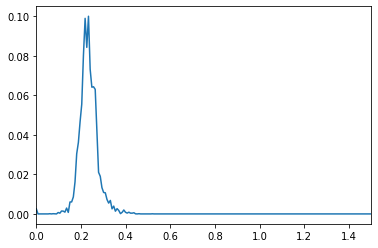

In [16]:
plt.plot(pdf_bins,pdf[0,:])
plt.xlim(0,1.5)


In [17]:
results = []
for i in range((13)):
    aux = metrics.compute_metrics(zspec[bins[i]],zphot[bins[i]],"ANNz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [18]:
df = pd.concat(results,ignore_index=False,axis = 1)

In [19]:
df

,ANNz-bins0,ANNz-bins1,ANNz-bins2,ANNz-bins3,ANNz-bins4,ANNz-bins5,ANNz-bins6,ANNz-bins7,ANNz-bins8,ANNz-bins9,ANNz-bins10,ANNz-bins11,ANNz-bins12
RMSE_znorm,0.0804415,0.0604527,0.0753505,0.0892523,0.0864163,0.0819971,0.0804589,0.0978601,0.0951854,0.103867,0.125286,0.10878,0.0988758
bias_znorm,0.00612453,0.000196976,0.00607307,0.0121534,0.00912314,0.00225837,0.00118611,0.00555002,0.00805072,0.0161975,0.0153758,0.0102129,0.00117826
std_znorm,0.080208,0.0604524,0.0751054,0.088421,0.0859334,0.081966,0.0804502,0.0977026,0.0948444,0.102596,0.124339,0.1083,0.0988688
RMSE,0.114032,0.10679,0.106303,0.13441,0.129701,0.127607,0.132891,0.138504,0.143899,0.151575,0.187299,0.167348,0.254268
|znorm| > 0.15 (%),4.15184,2.65268,3.18674,3.46294,4.53972,3.98202,4.38719,4.01515,4.98188,5.47619,7.72627,4.83092,9.375
|znorm| > 3std (%),2.37248,1.9124,2.03952,1.8226,1.9546,0.899165,1.25348,1.06061,1.17754,1.19048,1.766,0.966184,2.08333
scatter,0.0804415,0.0604527,0.0753505,0.0892523,0.0864163,0.0819971,0.0804589,0.0978601,0.0951854,0.103867,0.125286,0.10878,0.0988758
bias,0.0403833,0.034262,0.0437231,0.0461087,0.0483872,0.0507175,0.0497145,0.0528601,0.0534553,0.057301,0.0676795,0.0623852,0.0704416
fr015,95.8482,97.3473,96.8133,96.5371,95.4603,96.018,95.6128,95.9848,95.0181,94.5238,92.2737,95.1691,90.625
sigma68,"(-0.04794485, 0.04833735)","(-0.05803996, 0.05028771)","(-0.06692518, 0.0725635)","(-0.06303464, 0.07799285)","(-0.07549688, 0.07901357)","(-0.10344484, 0.08798355)","(-0.10515528, 0.08876048)","(-0.09642423, 0.09085277)","(-0.1001747, 0.1076534)","(-0.10173806, 0.13131408)","(-0.13881525, 0.12112742)","(-0.14595233, 0.13259535)","(-0.14671452, 0.16990859)"


In [20]:
stack = []
for i in range(len(bins)):
    stack.append(pdf[bins[i],:])


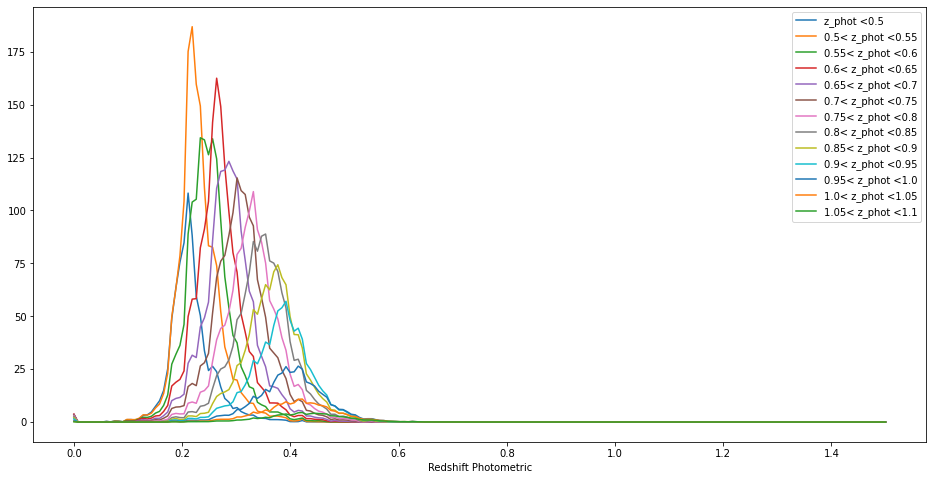

In [21]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
plt.plot(pdf_bins,np.sum(stack[0],axis = 0),label = "z_phot <0.5")
for i in range(12):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(pdf_bins,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2))
plt.legend()
plt.xlabel("Redshift Photometric")
plt.savefig("plots/pdf_stacked_phot.png",dpi = 500)

In [22]:
bins_spec = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (zspec>(j-0.05)) & (zspec<j)
    bins_spec.append(b)

In [23]:
bins_spec.insert(0,zspec<(0.5))

In [24]:
stack_spec = []
for i in range(len(bins_spec)):
    stack_spec.append(pdf[bins_spec[i],:])

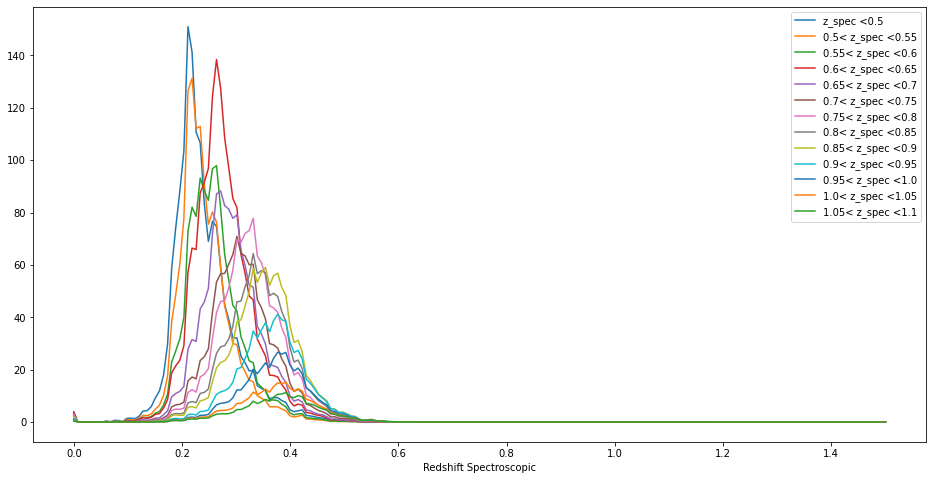

In [25]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
plt.plot(pdf_bins,np.sum(stack_spec[0],axis = 0),label = "z_spec <0.5")
j = 0.5
for i in range(12):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(pdf_bins,np.sum(stack_spec[i+1],axis = 0),label = str(st1)+"< z_spec <"+str(st2))
plt.legend()
plt.xlabel("Redshift Spectroscopic")
plt.savefig("plots/pdf_stacked_spec.png",dpi = 500)

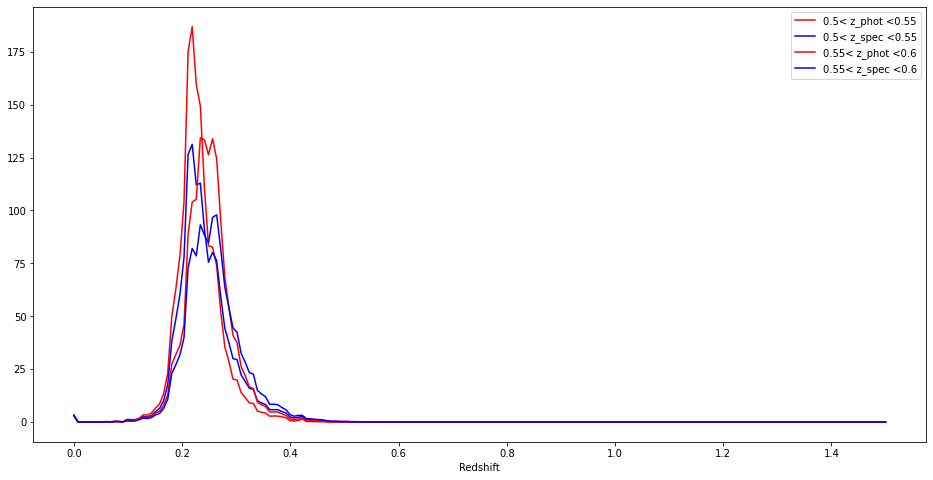

In [26]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
for i in range(2):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(pdf_bins,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2), c = "red")
    plt.plot(pdf_bins,np.sum(stack_spec[i+1],axis = 0),label = str(st1)+"< z_spec <"+str(st2), c = "blue")

plt.legend()
plt.xlabel("Redshift")
plt.savefig("plots/pdf_stacked_photandspec.png",dpi = 500)

In [27]:
cdf = []
for i in range(len(pdf)):
    cdf.append(np.cumsum(pdf[i,:]))

In [28]:
cdf[2].shape

(200,)

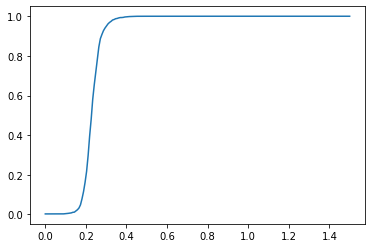

In [29]:
plt.plot(pdf_bins,cdf[0])

In [30]:
def mc_cdf(cdf,bins):
    rand = np.random.random()
    ind = np.where(cdf > rand)
    frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
    #print(frac)
    zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
    return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]


In [31]:
mc_cdf(cdf[0],pdf_bins)

(0.22500610894366568, 0.4675813068379654, 0.39592542323557, 0.48014616045557)

In [39]:
mc = []
for i in range(2000):
    zfinal, rand, cdf1,cdf2 = mc_cdf(cdf[5844],pdf_bins)
    mc.append(zfinal)

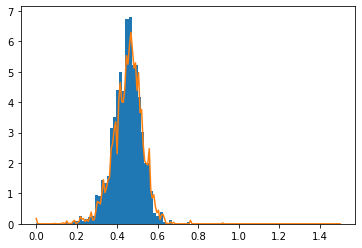

In [41]:
plt.hist(mc,bins=50,density = True);
plt.plot(pdf_bins, pdf[5844]*120)
plt.savefig("testes.png")

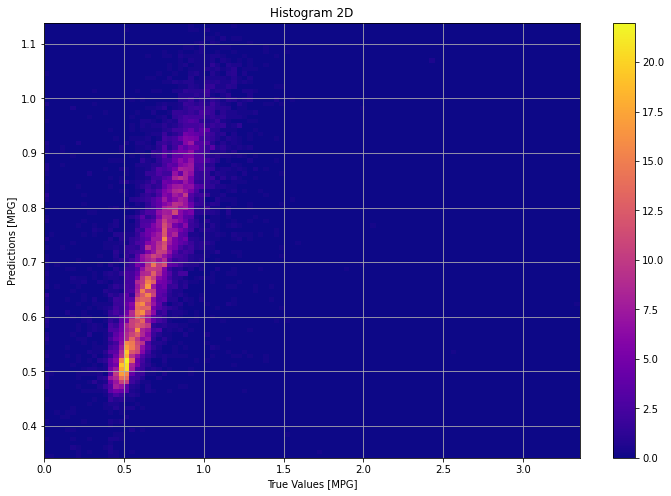

In [34]:
plt.figure(figsize = (12,8))
plt.title("Histogram 2D")
plt.hist2d(zspec,zphot, bins= 100,density=True,cmap = "plasma")
plt.colorbar()
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.grid()
#plt.show()
plt.savefig("plots/annz_hist2d.png", dpi = 500)
#plt.close()

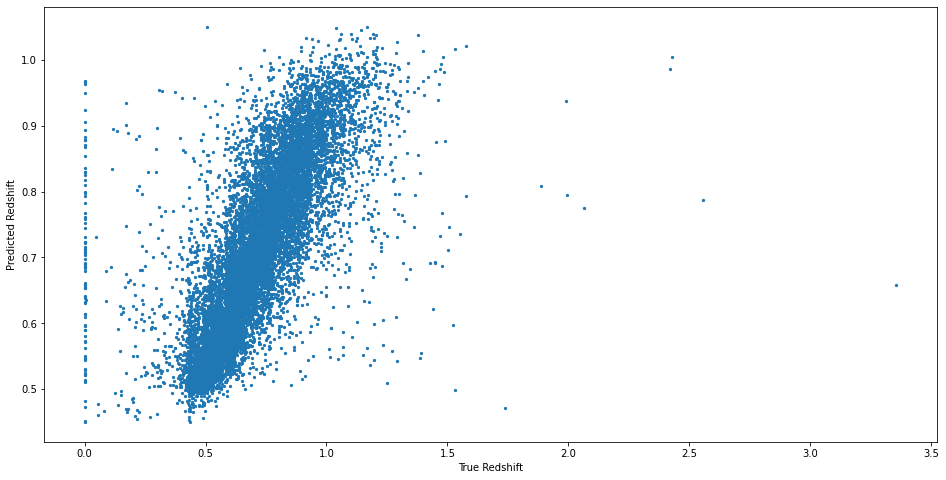

In [42]:
plt.figure(figsize=(16,8))
#plt.title("Predicted X True")
plt.scatter(zspec,data["F:ANNZ_PDF_avg_0"].values,s=5)
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.savefig("plots/annz_scatt.png", dpi = 500)

In [35]:
from scipy.stats import gaussian_kde

In [36]:
zspec.shape

(14298,)

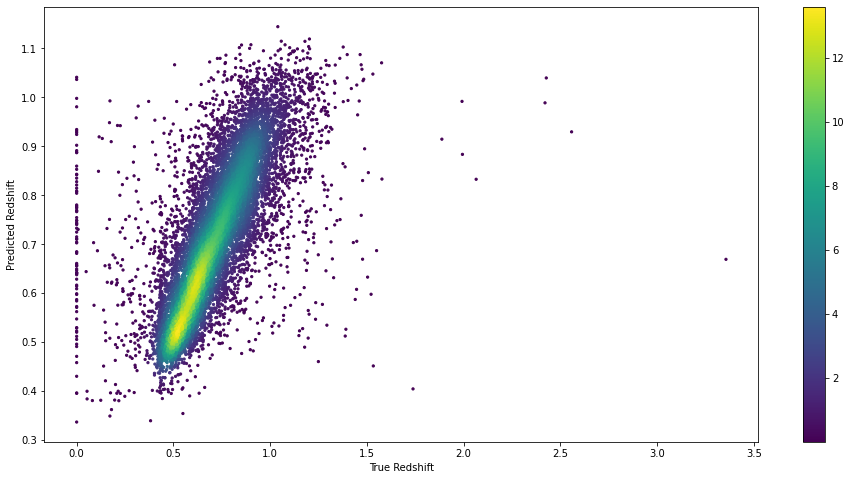

In [37]:
plt.figure(figsize=(16,8))
#plt.title("Probabilty using KDE- Estimation")
xy = np.hstack([zspec.reshape(-1,1),zphot.reshape(-1,1)]).T
z = gaussian_kde(xy)(xy)
plt.scatter(zspec,zphot,c=z,s=5)
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.colorbar()
#plt.savefig("plots/gpz_scatterprobs.png")
plt.savefig("plots/annz_scatt_probs.png",dpi = 500)

In [38]:
pdf_bins[53]

0.39949748743718594

In [39]:
mc = np.asanyarray(mc)